In [ ]:
!pip install -q torch torchvision matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.9 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


In [ ]:
import os

data_path = "/content/drive/MyDrive/sign_data/train"
print("Folders found:", os.listdir(data_path))


Folders found: ['002', '001', '003_forg', '001_forg', '003', '002_forg', '013', '009', '004_forg', '006', '004', '012_forg', '009_forg', '006_forg', '012', '013_forg', '014', '015_forg', '015', '018', '016', '018_forg', '016_forg', '017', '014_forg', '017_forg', '023_forg', '020_forg', '021', '020', '022_forg', '021_forg', '019_forg', '019', '023', '022', '027_forg', '025_forg', '025', '024_forg', '024', '026', '027', '026_forg', '028', '028_forg', '032_forg', '031', '033_forg', '032', '029_forg', '030_forg', '030', '031_forg', '033', '029', '036', '035', '035_forg', '036_forg', '037', '038', '034_forg', '037_forg', '038_forg', '034', '039', '041', '040', '042', '043_forg', '039_forg', '040_forg', '043', '041_forg', '042_forg', '047', '047_forg', '044_forg', '048_forg', '046_forg', '045_forg', '045', '048', '044', '046', '053', '049', '052', '053_forg', '050_forg', '050', '049_forg', '051', '052_forg', '051_forg', '056', '054_forg', '055', '056_forg', '054', '057', '058', '055_forg', '

In [ ]:
sample_user = os.path.join(data_path, os.listdir(data_path)[0])
print("Sample user folder:", sample_user)
print("Files in it:", os.listdir(sample_user))


Sample user folder: /content/drive/MyDrive/sign_data/train/002
Files in it: ['002_01.PNG', '002_05.PNG', '002_03.PNG', '002_02.PNG', '002_04.PNG', '002_06.PNG', '002_23.PNG', '002_19.PNG', '002_13.PNG', '002_12.PNG', '002_08.PNG', '002_20.PNG', '002_17.PNG', '002_24.PNG', '002_09.PNG', '002_18.PNG', '002_14.PNG', '002_11.PNG', '002_16.PNG', '002_21.PNG', '002_07.PNG', '002_10.PNG', '002_22.PNG', '002_15.PNG']


In [ ]:
genuine_path = "/content/drive/MyDrive/sign_data/train/002"
print("Files in 002:", os.listdir(genuine_path))


Files in 002: ['002_01.PNG', '002_05.PNG', '002_03.PNG', '002_02.PNG', '002_04.PNG', '002_06.PNG', '002_23.PNG', '002_19.PNG', '002_13.PNG', '002_12.PNG', '002_08.PNG', '002_20.PNG', '002_17.PNG', '002_24.PNG', '002_09.PNG', '002_18.PNG', '002_14.PNG', '002_11.PNG', '002_16.PNG', '002_21.PNG', '002_07.PNG', '002_10.PNG', '002_22.PNG', '002_15.PNG']


In [ ]:
print([f for f in os.listdir(genuine_path) if f.endswith(".PNG")])


['002_01.PNG', '002_05.PNG', '002_03.PNG', '002_02.PNG', '002_04.PNG', '002_06.PNG', '002_23.PNG', '002_19.PNG', '002_13.PNG', '002_12.PNG', '002_08.PNG', '002_20.PNG', '002_17.PNG', '002_24.PNG', '002_09.PNG', '002_18.PNG', '002_14.PNG', '002_11.PNG', '002_16.PNG', '002_21.PNG', '002_07.PNG', '002_10.PNG', '002_22.PNG', '002_15.PNG']


In [ ]:
class SignatureDataset(Dataset):
    def __init__(self, base_path, transform=None):
        self.base_path = base_path
        self.transform = transform
        self.pairs = []

        users = sorted([f for f in os.listdir(base_path) if f.isdigit()])

        for user in users:
            genuine_path = os.path.join(base_path, user)
            forged_path = os.path.join(base_path, f"{user}_forg")

            if not os.path.isdir(genuine_path) or not os.path.isdir(forged_path):
                continue

            genuine_imgs = [f for f in os.listdir(genuine_path) if f.lower().endswith(".png")]
            forged_imgs = [f for f in os.listdir(forged_path) if f.lower().endswith(".png")]

            for g in genuine_imgs:
                # Positive pair
                genuine_alts = [x for x in genuine_imgs if x != g]
                if genuine_alts:
                    g2 = random.choice(genuine_alts)
                    self.pairs.append((
                        os.path.join(genuine_path, g),
                        os.path.join(genuine_path, g2),
                        1
                    ))

                # Negative pair
                if forged_imgs:
                    f = random.choice(forged_imgs)
                    self.pairs.append((
                        os.path.join(genuine_path, g),
                        os.path.join(forged_path, f),
                        0
                    ))

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path, label = self.pairs[idx]
        img1 = Image.open(img1_path).convert("L")
        img2 = Image.open(img2_path).convert("L")

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, torch.tensor([label], dtype=torch.float32)


In [ ]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Dummy pass to calculate the flattened feature size
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 100, 100)  # (batch, channel, H, W)
            dummy_out = self.cnn(dummy)
            self.flat_dim = dummy_out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Linear(self.flat_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward_one(self, x):
        out = self.cnn(x)
        return out.view(out.size(0), -1)

    def forward(self, x1, x2):
        out1 = self.forward_one(x1)
        out2 = self.forward_one(x2)
        return self.fc(torch.abs(out1 - out2))


In [ ]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor()
])

data_path = "/content/drive/MyDrive/sign_data/train"
dataset = SignatureDataset(data_path, transform=transform)
loader = DataLoader(dataset, shuffle=True, batch_size=8)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SiameseNetwork().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(2):
    model.train()
    total_loss = 0
    for img1, img2, label in loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(img1, img2)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/5, Loss: {total_loss:.4f}")


Epoch 1/5, Loss: 104.0123
Epoch 2/5, Loss: 63.5004


In [ ]:
import torch
print("CUDA Available?", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA Available? False
Device: CPU


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/signature_siamese.pth")
print("Model saved.")


Model saved.


In [ ]:
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F

# Define the same transform used during training
test_transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor()
])

def predict_signature_match(model, path1, path2, threshold=0.5):
    model.eval()
    img1 = Image.open(path1).convert("L")
    img2 = Image.open(path2).convert("L")

    img1 = test_transform(img1).unsqueeze(0).to(device)  # add batch dim
    img2 = test_transform(img2).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img1, img2)
        prob = torch.sigmoid(output).item()

    label = "Genuine Match ✅" if prob >= threshold else "Forged ❌"
    print(f"Similarity Score: {prob:.4f} → {label}")


In [ ]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import torch

# Use same transform as training
test_transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor()
])

def show_and_predict(model, path1, path2, threshold=0.5):
    model.eval()
    img1_raw = Image.open(path1).convert("L")
    img2_raw = Image.open(path2).convert("L")

    img1 = test_transform(img1_raw).unsqueeze(0).to(device)
    img2 = test_transform(img2_raw).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img1, img2)
        prob = torch.sigmoid(output).item()

    label = " Genuine Match" if prob >= threshold else " Forged"
    print(f"Similarity Score: {prob:.4f} → {label}")

    # Show the images side by side
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(img1_raw, cmap='gray')
    axs[0].set_title("Signature 1")
    axs[0].axis('off')

    axs[1].imshow(img2_raw, cmap='gray')
    axs[1].set_title("Signature 2")
    axs[1].axis('off')

    plt.suptitle(f"Prediction: {label} (Score: {prob:.2f})", fontsize=14)
    plt.tight_layout()
    plt.show()


Similarity Score: 0.4522 →  Forged


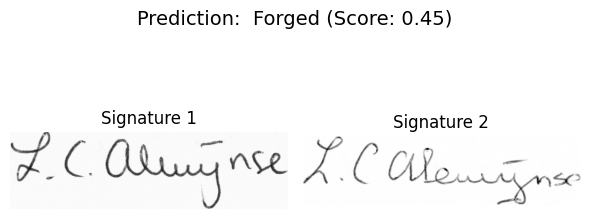

In [ ]:
show_and_predict(
    model,
    "/content/drive/MyDrive/sign_data/train/002/002_01.PNG",
    "/content/drive/MyDrive/sign_data/train/002_forg/0108002_01.png"
)
